In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


## 1. About the Data

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## --> Data is cleaned

## 2. Ojective

- Accurately predict insurance costs
- Understand the factors influencing insurance costs
- Improve pricing decision-making for insurers
- Provide insights for customers
- Build a high-performance predictive model

## 3. Linear Regression Models

Mean Squared Error: 33596915.85136146
R-squared: 0.7835929767120723


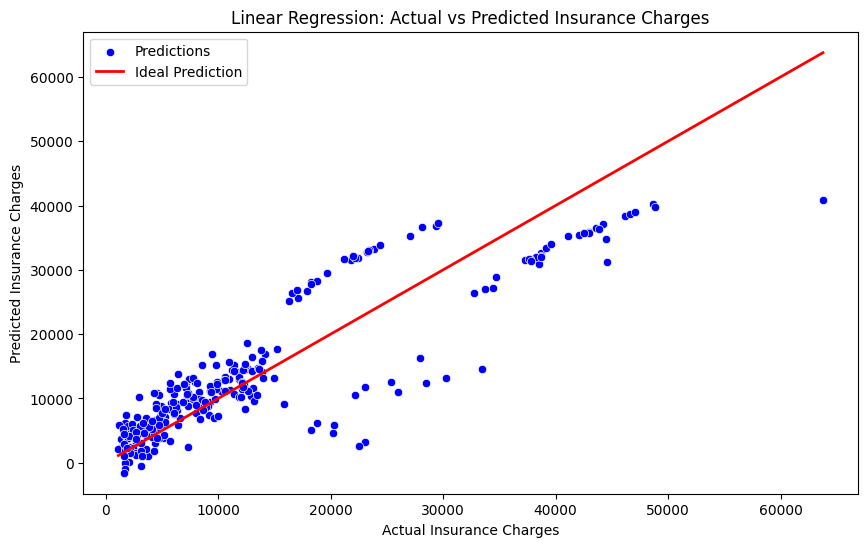

In [11]:
data = pd.read_csv('insurance.csv')

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop('charges', axis=1)  
y = data_encoded['charges']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Predicted Insurance Charges')
plt.title('Linear Regression: Actual vs Predicted Insurance Charges')
plt.legend()
plt.show()

## 4 Insights and key findings

1. Impact of Smoking, BMI, and Age on Insurance Charges
Key Finding: Smokers tend to have significantly higher insurance charges compared to non-smokers. Additionally, there is a positive correlation between BMI and insurance charges, and older individuals tend to have higher medical insurance charges. Insight: These factors are likely the most influential in driving up medical costs due to associated health risks. Smoking increases the likelihood of chronic illnesses, higher BMI values often correspond to obesity-related conditions, and age is directly related to the increasing risk of chronic conditions and general health decline. Business Insight: Insurance companies could set higher premiums for smokers and individuals with higher BMI to account for increased medical costs. Age-specific packages could better cater to the healthcare needs of different age groups. Public Health Insight: Encouraging customers to quit smoking and maintain a healthier BMI could help reduce overall healthcare costs, potentially lowering premiums.

2. Family Structure and Regional Differences
Key Finding: Individuals with more children may have higher insurance costs due to family-related coverage, but the relationship might be weaker compared to smoking or BMI. There are also notable variations in insurance charges across different regions, such as higher costs in the southeast compared to the northwest. Insight: While having more children slightly increases costs, individual health-related attributes like BMI or smoking have a more significant impact. Regional differences could stem from varying healthcare costs, access, or demographic characteristics. Business Insight: Family insurance plans can adjust premiums for dependent coverage while still emphasizing personal health factors for adults. Regional pricing strategies could help insurance companies adjust premiums based on location-specific healthcare risks.

3. Model Accuracy and Feature Importance
Key Finding: The most accurate and interpretable model balances prediction accuracy with model complexity. Regularized models like Lasso regression might prove best, as they reduce overfitting by selecting only the most important features. Features such as smoking, BMI, and age are highly predictive of insurance costs, while others like region or the number of children may have a more limited impact. Insight: This finding emphasizes the importance of focusing on health-related features in cost prediction models, leading to more accurate and personalized pricing strategies. Model Performance:

Mean Squared Error (MSE): Lower MSE indicates better predictions.

R² Score: High R² score means the model captures most of the variance in insurance charges, suggesting it explains the variation effectively without over-complicating the interpretation.

Potential Limitations
Non-linear Relationships: Linear regression assumes a linear relationship between predictors and the target variable. Non-linear relationships (e.g., BMI or age) may not be accurately captured.

Omitted Variables: Other factors influencing insurance charges might be absent from the dataset (e.g., pre-existing health conditions, lifestyle habits like alcohol consumption).

These consolidated insights provide a comprehensive understanding of factors influencing insurance charges and guide better strategies for setting premiums and managing healthcare costs.

## 5. Next Steps

- Feature Engineering: Add new health-related features (e.g., exercise, diet) and explore interaction terms (e.g., age and smoking).

- Non-linear Models: Test more advanced models like decision trees, random forests, or neural networks to capture non-linear relationships.

- Regularization & Cross-Validation: Apply regularization (Ridge/Lasso) and cross-validation to improve model robustness and prevent overfitting.

- Data Expansion: Gather more data to improve generalization and explore time-based patterns if available.

- Handle Imbalances & Outliers: Address class imbalances (e.g., smokers) and investigate outliers to improve model accuracy.

- Model Explainability: Use SHAP or LIME for better interpretation, ensuring transparency in model predictions.

- Fairness & Bias: Evaluate model fairness across different groups and adjust if necessary to avoid bias.